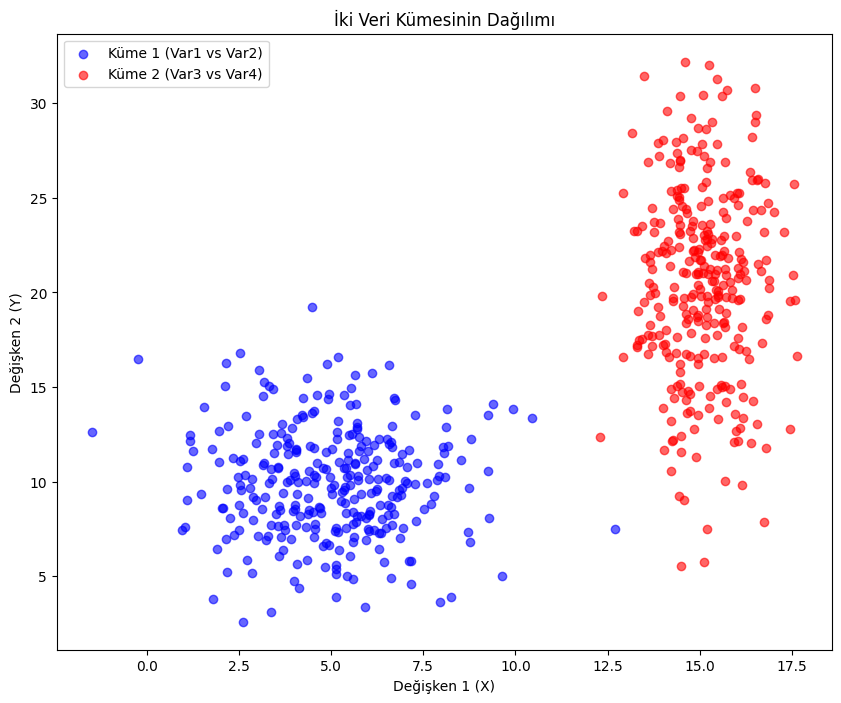

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Veri Kümesi 1: Ortalama 5, Standart sapma 2
np.random.seed(42)
var1_mean = 5
var1_std = 2
count = 300
var1 = np.random.normal(var1_mean, var1_std, count)  # 200 gözlem

# Veri Kümesi 2: Ortalama 10, Standart sapma 3
var2_mean = 10
var2_std = 3
var2 = np.random.normal(var2_mean, var2_std, count)  # 200 gözlem

# Veri Kümesi 3: Ortalama 15, Standart sapma 1
var3_mean = 15
var3_std = 1
var3 = np.random.normal(var3_mean, var3_std, count)  # 200 gözlem

# Veri Kümesi 4: Ortalama 20, Standart sapma 5
var4_mean = 20
var4_std = 5
var4 = np.random.normal(var4_mean, var4_std, count)  # 200 gözlem

# X ve Y değişkenlerine atama
x1, y1 = var1, var2  # 1. küme (X, Y)
x2, y2 = var3, var4  # 2. küme (X, Y)

# Scatter Plot ile görselleştirme
plt.figure(figsize=(10, 8))

# İlk küme (X1, Y1)
plt.scatter(x1, y1, c='blue', label="Küme 1 (Var1 vs Var2)", alpha=0.6)

# İkinci küme (X2, Y2)
plt.scatter(x2, y2, c='red', label="Küme 2 (Var3 vs Var4)", alpha=0.6)

# Eksen etiketleri ve başlık
plt.title("İki Veri Kümesinin Dağılımı")
plt.xlabel("Değişken 1 (X)")
plt.ylabel("Değişken 2 (Y)")

# Grafik üzerindeki etiketler
plt.legend()
plt.savefig('veriseti.png')

# Görselleştirmeyi göster
plt.show()


In [2]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(300,)
(300,)
(300,)
(300,)


In [3]:
# Küme etiketlerini oluşturma: Küme 1 için 0, Küme 2 için 1
labels1 = np.zeros(x1.shape[0])
labels2 = np.ones(x2.shape[0])

# Veri kümesini birleştir
X = np.concatenate([np.column_stack((x1, y1)), np.column_stack((x2, y2))], axis=0)
y = np.concatenate([labels1, labels2])

In [4]:
print(X.shape)
print(y.shape)

(600, 2)
(600,)


In [5]:
X[10:]

array([[ 4.07316461,  9.34695639],
       [ 4.06854049, 13.29633056],
       [ 5.48392454, 12.47624905],
       ...,
       [15.14671369, 22.76244977],
       [16.20650897, 21.11957067],
       [14.18306433, 26.82070215]])

In [5]:
from sklearn.utils import shuffle

# Verileri karıştırma
X, y = shuffle(X, y, random_state=42)
#X, y = np.array([X.flatten(), y]).T, y  # Bu X ve y'yi birleştirip karıştırmak için uygun
# Eğer büyük veri seti oluşturup karıştıracaksanız torch önerilir.



In [6]:
import torch 
# Karıştırıldıktan sonra NumPy array'lerini PyTorch tensor'larına dönüştürme
X_tensor = torch.tensor(X, dtype=torch.float32)  
y_tensor = torch.tensor(y, dtype=torch.float32)    

# Tensor'lar artık kullanılabilir
print(X_tensor.shape)  
print(y_tensor.shape)  

torch.Size([600, 2])
torch.Size([600])


In [8]:
import numpy as np

def normalize_data(X):
    """
    Verilen giriş verisini (X) z-skore normalizasyonu ile normalize eder.
    X: (n, m) boyutunda giriş matrisi
    """
    mean = torch.mean(X, axis=0)  # Her sütun (özellik) için ortalama
    std = torch.std(X, axis=0)    # Her sütun (özellik) için standart sapma
    
    # Normalizasyon işlemi
    X_normalized = (X - mean) / std
    
    return X_normalized


X_normalized = normalize_data(X_tensor)

In [ ]:
###                                     FORWARD
#       (n,2) bir giriş matrisi var. Çıktımızı ise hangi sınıf olduğu yani (n,1)
#       O zaman ağırlık matrisimizin boyutu (2,1) olmalı gibi ama transpozesi alınacağı için 1x2 olmalı
#       Ama burada gösterimsel olarak anlatmak için 2x1 lik matris oluşturuyoruz.
###

W = torch.zeros((2,1),dtype=torch.float32)
W[0] = 0.36
W[1] = 0.50
W

tensor([[0.3600],
        [0.5000]])

In [ ]:
#Paintte görselleştir.
output = torch.matmul(X_normalized[:10], W)
print(output)
print(X_normalized[:10])
print(W)

tensor([[-0.8343],
        [ 0.8503],
        [ 1.5807],
        [-0.7321],
        [-1.0634],
        [-0.4012],
        [-0.8444],
        [ 0.9486],
        [-0.2292],
        [ 0.8340]])
tensor([[-1.6786, -0.4601],
        [ 0.9284,  1.0321],
        [ 0.8658,  2.5381],
        [-1.0658, -0.6969],
        [-1.2769, -1.2074],
        [-0.1456, -0.6975],
        [-1.1280, -0.8767],
        [ 1.2821,  0.9741],
        [-0.9179,  0.2026],
        [ 1.0709,  0.8970]])
tensor([[0.3600],
        [0.5000]])


In [115]:
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_matrix_multiplication(X, W, y=None):
    """
    X: Giriş verisi (nöron girişi) - (n, m) boyutunda bir matris
    W: Ağırlık matrisi - (m, 1) boyutunda bir vektör
    y: Gerçek değerler - (n,) boyutunda bir vektör (isteğe bağlı)
    """
    # Matris çarpımı ile çıkışı hesapla
    output = torch.matmul(X, W)

    # Renkler oluştur (matplotlib renk skalasından farklı renkler seç)
    colors = list(mcolors.TABLEAU_COLORS.values())  # Kullanılabilir renkler

    # Görselleştirme
    plt.figure(figsize=(12, 8))

    for i in range(X.shape[0]):
        # Her örnek için renk seç
        color = colors[i % len(colors)]

        # Giriş verilerini scatter plot ile göster
        plt.scatter(X[i, 0].item(), X[i, 1].item(), c=color, label=f'X[{i}]', marker='o')

        # Çıkışı yeşil renkte ve scatter plot ile göster
        plt.scatter(output[i].item(), 0, c=color, label=f'Output[{i}]', marker='x')

        # Gerçek değerler (y) varsa, onları mor renkte scatter plot ile göster
        if y is not None:
            plt.scatter(y[i].item(), 0.1, c=color, label=f'y[{i}]', marker='s')

    # Ağırlık vektörünü bir ok (arrow) olarak göster
    plt.quiver(0, 0, W[0].item(), W[1].item(), angles='xy', scale_units='xy', scale=1, color='black', label='W (Ağırlık Vektörü)')

    # Etiketler ve başlık
    plt.title("Matris Çarpımı ve Görselleştirme")
    plt.xlabel("Özellik 1")
    plt.ylabel("Özellik 2")
    plt.legend(loc="best", bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.grid(True)

    # Grafik gösterimi
    plt.show()

    return output


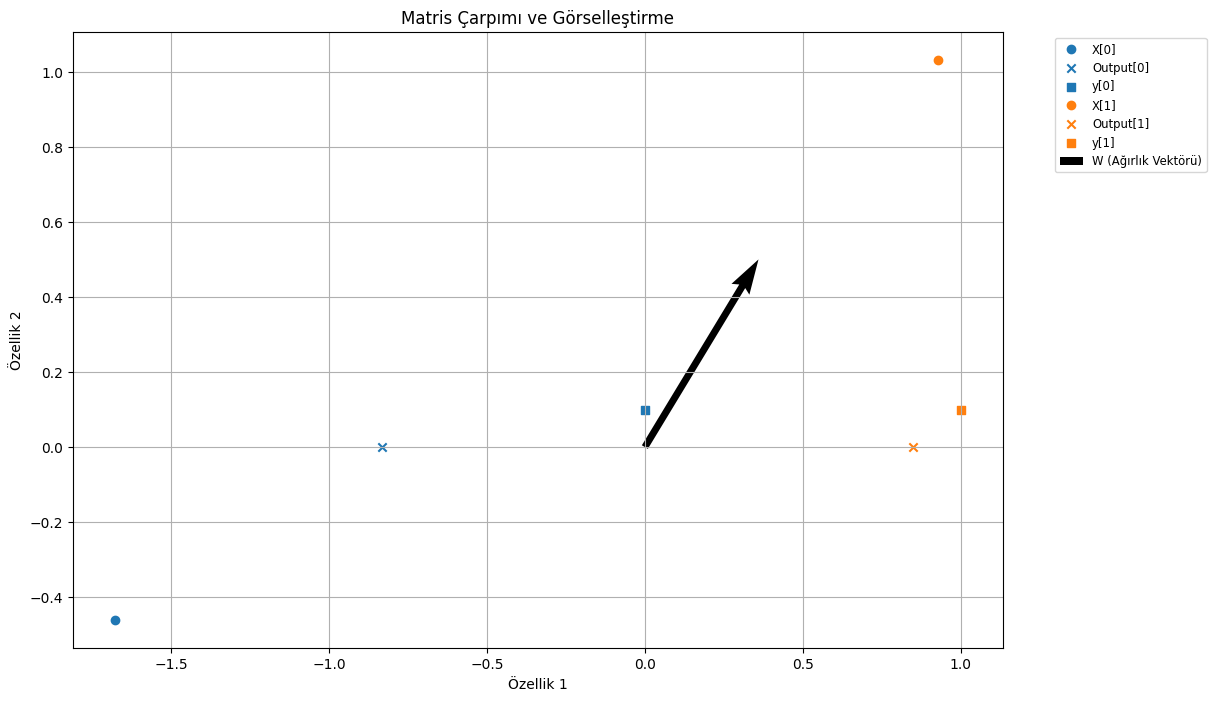

In [118]:
# Fonksiyonu çağırarak görselleştirmeyi yap ve çıktıyı al
output = visualize_matrix_multiplication(X_normalized[:2], W,y_tensor[:2])

In [8]:
X = X_tensor
y = y_tensor

print(X.shape)
print(y.shape)

torch.Size([600, 2])
torch.Size([600])


In [38]:
#Transpoze almadan (2,1)lik matris oluşturulabilir,sonuç değişmez.
#requires_grad=True Bu gradient yani türevi alınabilir. anlamındadır. Opt. GPU için
bias = 1
W = torch.zeros((1, 2), dtype=torch.float32, requires_grad=False)
z = X[:1] @ W.T + bias


In [40]:
#y_pred = torch.sigmoid(z)          Bu opt. için gpu desteği vs sunar.

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

y_pred = sigmoid(z)
print(y_pred)
print(y[0])

tensor([[0.7311]])
tensor(0.)


In [41]:
#Hazır binary cross entropy loss fonksiyonu loss_fn = torch.nn.BCELoss() 
def binary_cross_entropy(y_pred, y_true):
    epsilon = 1e-10  # Sıfıra bölmeyi önlemek için küçük bir değer
    return -torch.mean(y_true * torch.log(y_pred + epsilon) + (1 - y_true) * torch.log(1 - y_pred + epsilon))

loss = binary_cross_entropy(y_pred,y[0])
print(loss)

tensor(1.3133)


In [55]:
#Ağırlıkların ve biasın güncellenmesi
# Ağırlıktaki değişim Loss'un w'ya göre türevidir. Bu da (y_pred - y_true) * X 'tir.
lr =0.1        #Öğrenme oranımız
y_true = y[0]

W_degisim = X[0].view(-1,1) @ (y_pred - y_true) 
W_new =W + lr * W_degisim.T

print(f"Eski ağırlığımız: {W}")
print(f"Ağırlıktaki değişimimiz: {W_degisim}")
print(f"Yeni ağırlığımız: {W_new}")

Eski ağırlığımız: tensor([[0., 0.]])
Ağırlıktaki değişimimiz: tensor([[-1.2272],
        [-0.3363]])
Yeni ağırlığımız: tensor([[-0.1227, -0.0336]])


In [56]:
# Biastaki değişim 
# Biasa göre Loss fonksiyonun türevinin alınmasıdır. Bu da ----> sum(y_pred - y_true)
b_degisim = torch.sum(y_pred - y_true)  # Biasın türevi
b_new = bias - lr * b_degisim  # Biasın güncellenmesi

print(f"Eski bias: {bias}")
print(f"Biastaki değişimimiz: {b_degisim}")
print(f"Yeni biasımız: {b_new}")

Eski bias: 1
Biastaki değişimimiz: 0.7310585975646973
Yeni biasımız: 0.9268941283226013


In [74]:
z_2 = X[0] @ W_new.T + b_new
y_pred_2 = sigmoid(z_2)
print(y_pred_2)
print(y[0])

tensor([0.7592])
tensor(0.)


In [35]:
import torch

# Parametreler
lr = 0.01  # Öğrenme oranı
epochs = 100  # Eğitim döngüsü sayısı

W = torch.zeros((2, 1), dtype=torch.float32)  # 2x1 matris, her özellik için bir ağırlık
b = torch.zeros(1, dtype=torch.float32)  # Bias

# Sigmoid aktivasyonu
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Eğitim Döngüsü
for epoch in range(epochs):
    total_loss = 0  # Toplam kayıp
    for i in range(len(X)):
        # Adım 1: Veriyi al
        x_sample, y_sample = X[i], y[i]

        # Adım 2: Model çıktısını hesapla (Linear: X * W + b)
        z = torch.matmul(x_sample, W) + b  # z = XW^T + b
        y_pred = sigmoid(z)  # Sigmoid aktivasyonu

        # Adım 3: Kayıp fonksiyonunu hesapla (Binary Cross-Entropy Loss)
        loss = - (y_sample * torch.log(y_pred) + (1 - y_sample) * torch.log(1 - y_pred))
        total_loss += loss.item()

        # Adım 4: Gradyan hesaplama (manual backpropagation)
        # BCE'ye göre gradyan hesaplama
        grad_W = (y_pred - y_sample) * x_sample.view(-1, 1)  # Ağırlık gradyanı
        grad_b = (y_pred - y_sample)  # Bias gradyanı

        # Adım 5: Ağırlıkları güncelle
        W -= lr * grad_W
        b -= lr * grad_b

    # Ortalama kaybı her 10 iterasyonda yazdır
    if epoch % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {total_loss / len(X)}")


Epoch 1, Loss: 0.29367546511193116
Epoch 11, Loss: 0.027215784154104767
Epoch 21, Loss: 0.01736994054556514
Epoch 31, Loss: 0.013522118181642024
Epoch 41, Loss: 0.011399008500469184
Epoch 51, Loss: 0.010025774639171535
Epoch 61, Loss: 0.009051514340440766
Epoch 71, Loss: 0.008317209563404239
Epoch 81, Loss: 0.007739565102691301
Epoch 91, Loss: 0.007270523595804264


In [36]:
print(f"Öğrenilen Ağırlıklar (W): {W}")
print(f"Öğrenilen Bias (b): {b}")

Öğrenilen Ağırlıklar (W): tensor([[6.1187],
        [2.4314]])
Öğrenilen Bias (b): tensor([-0.3856])


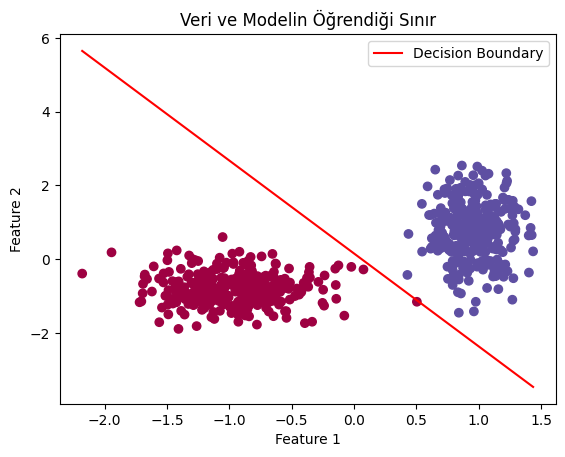

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Öğrenilen ağırlık ve bias
w1, w2 = W[0].item(), W[1].item()
bias = b.item()

# Veri noktalarını görselleştirelim
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)  # X verisi ve etiketleri scatter ile çiziyoruz
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Modelin öğrendiği doğrusal sınırı çizelim: w1 * X1 + w2 * X2 + b = 0
# Yani: X2 = -(w1 * X1 + b) / w2
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w1 * x_vals + bias) / w2

plt.plot(x_vals, y_vals, label='Decision Boundary', color='red')  # Doğrusal sınır

plt.title('Veri ve Modelin Öğrendiği Sınır')
plt.legend()
plt.show()


In [75]:
def plot_decision_boundary(X, y, W, b, epoch):
    # Öğrenilen ağırlıklar
    w1, w2 = W[0].item(), W[1].item()
    bias = b.item()

    # Veri noktalarını scatter plot ile çizelim
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)  # X verisi ve etiketleri
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Modelin öğrendiği doğrusal sınırı çizelim
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w1 * x_vals + bias) / w2
    plt.plot(x_vals, y_vals, label='Decision Boundary', color='red')

    # Başlık ve efsane
    plt.title(f'Epoch {epoch + 1}')
    plt.legend()
    plt.show()

Epoch 1, Loss: nan, Accuracy (by boundary): 85.50%


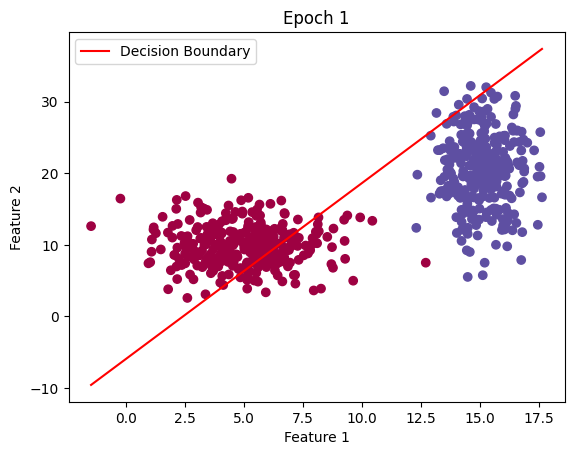

Epoch 3, Loss: nan, Accuracy (by boundary): 66.50%


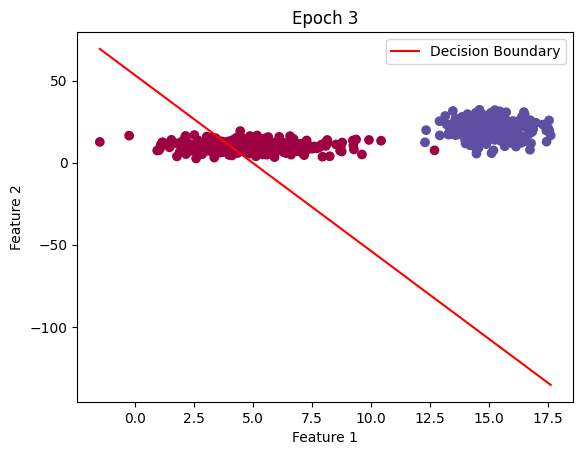

Epoch 5, Loss: nan, Accuracy (by boundary): 99.83%


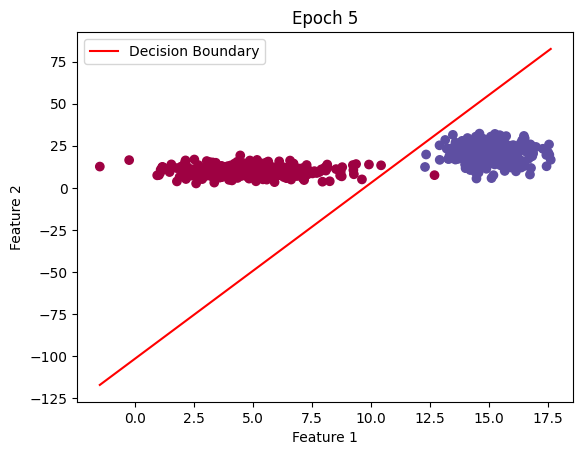

Epoch 7, Loss: nan, Accuracy (by boundary): 99.83%


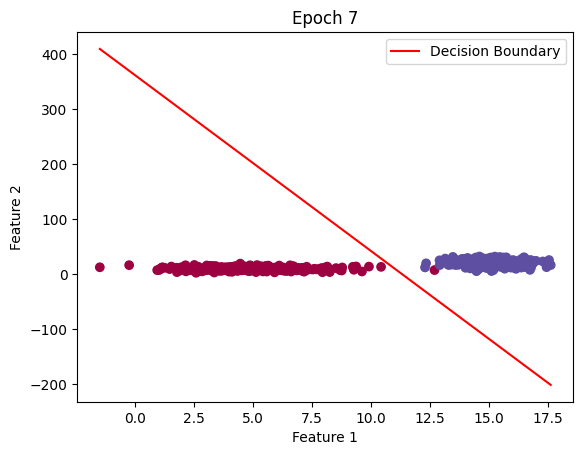

Epoch 9, Loss: nan, Accuracy (by boundary): 99.83%


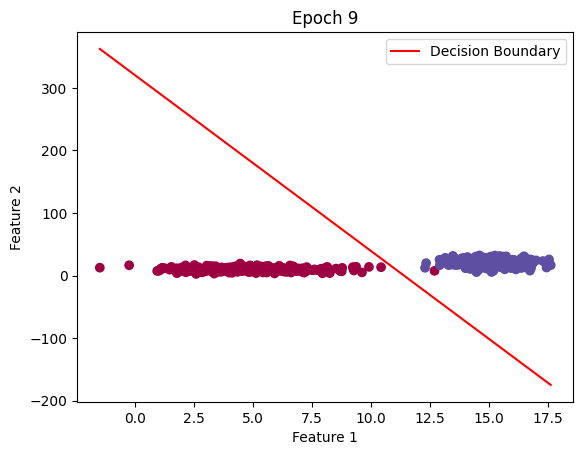

Epoch 11, Loss: nan, Accuracy (by boundary): 99.83%


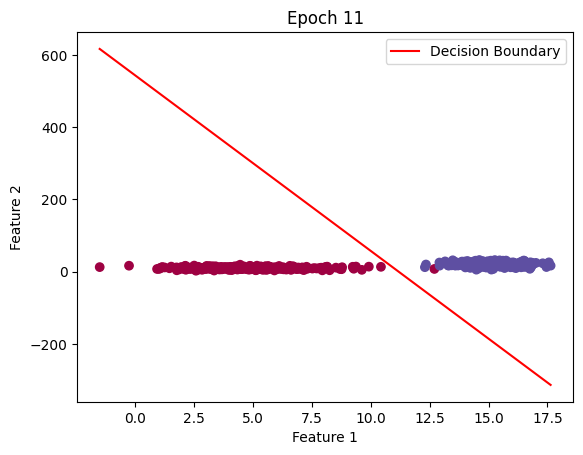

Epoch 13, Loss: nan, Accuracy (by boundary): 99.83%


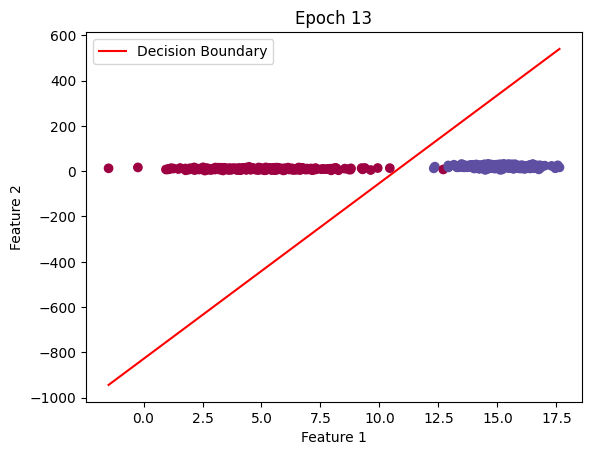

Epoch 15, Loss: nan, Accuracy (by boundary): 99.83%


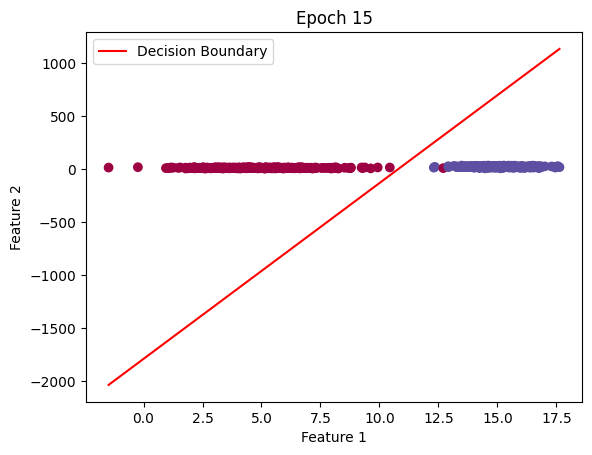

Epoch 17, Loss: nan, Accuracy (by boundary): 99.83%


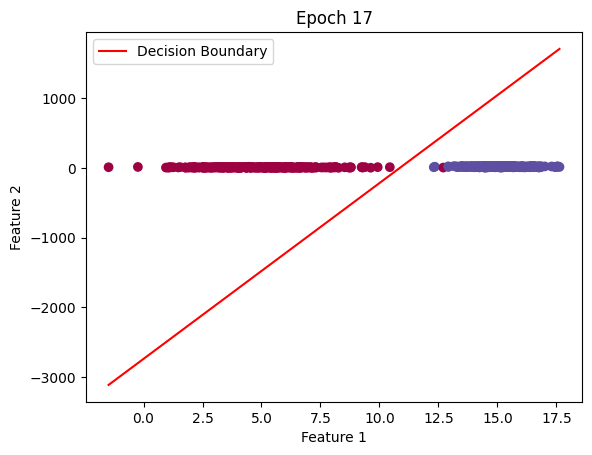

Epoch 19, Loss: nan, Accuracy (by boundary): 99.83%


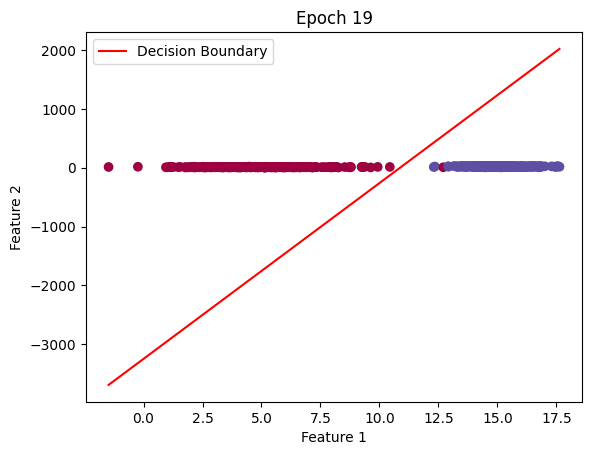

Epoch 21, Loss: nan, Accuracy (by boundary): 99.83%


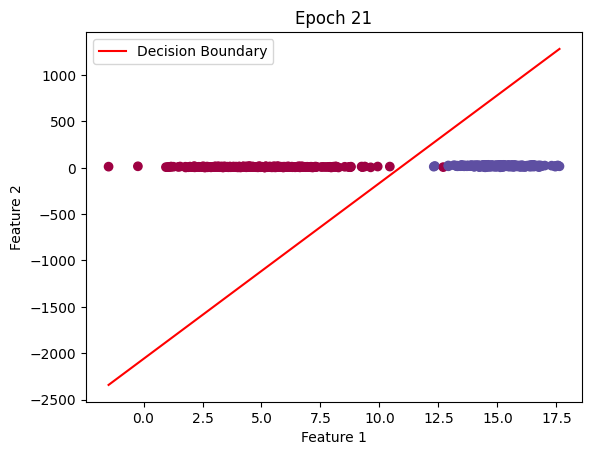

Epoch 23, Loss: nan, Accuracy (by boundary): 99.83%


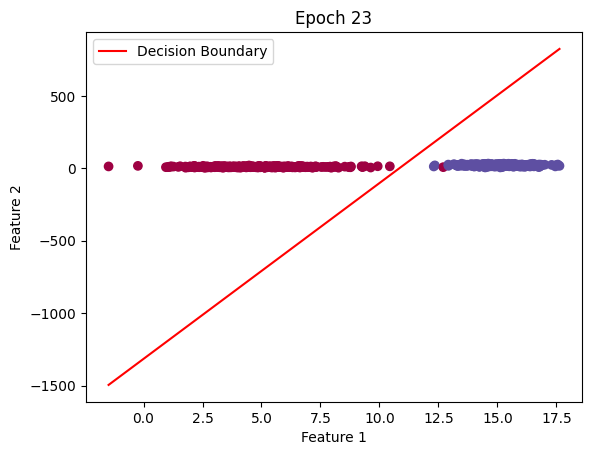

Epoch 25, Loss: nan, Accuracy (by boundary): 99.83%


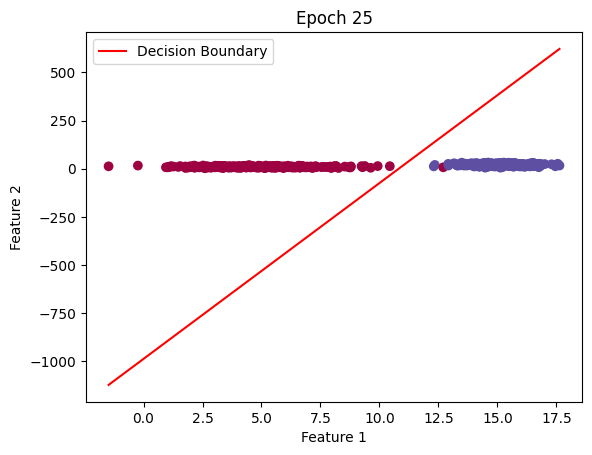

Epoch 27, Loss: nan, Accuracy (by boundary): 99.83%


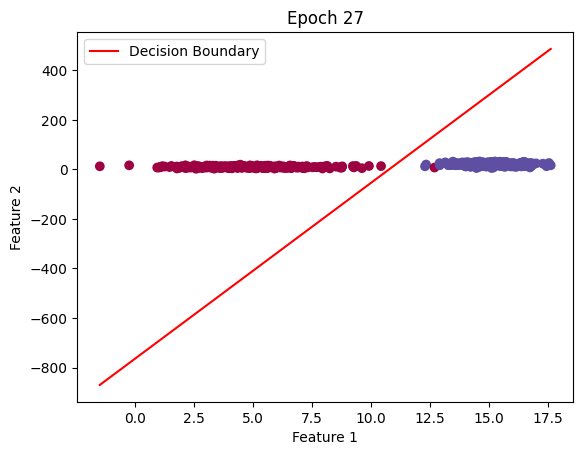

Epoch 29, Loss: nan, Accuracy (by boundary): 99.83%


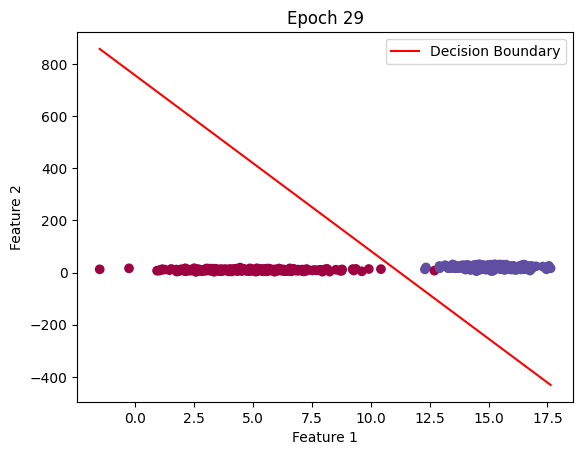

Epoch 31, Loss: nan, Accuracy (by boundary): 99.83%


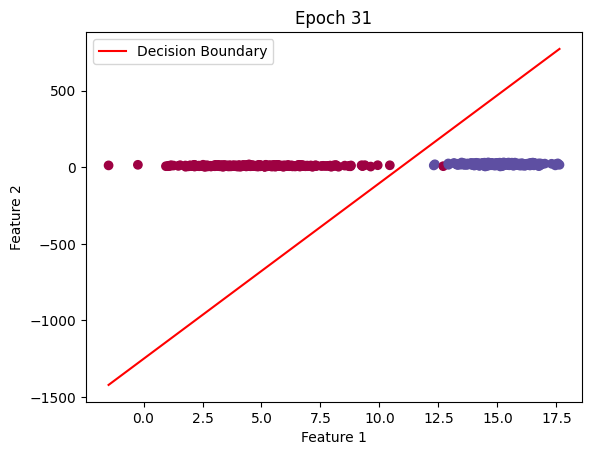

Epoch 33, Loss: nan, Accuracy (by boundary): 99.83%


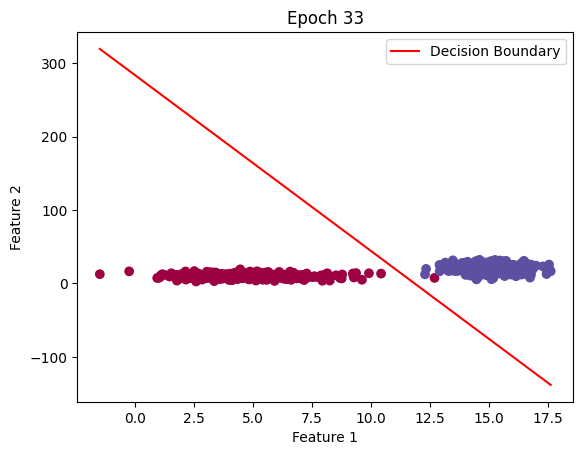

Epoch 35, Loss: nan, Accuracy (by boundary): 99.83%


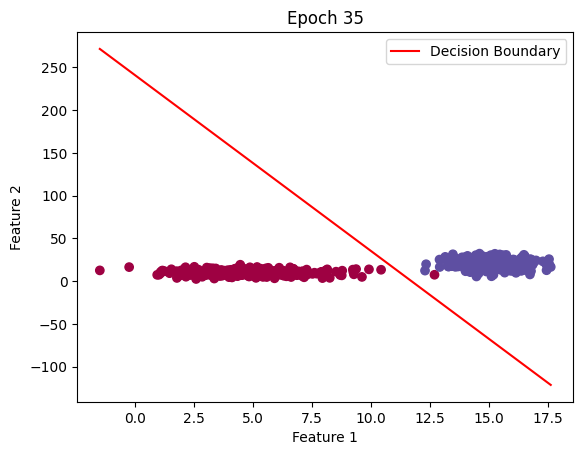

Epoch 37, Loss: nan, Accuracy (by boundary): 99.83%


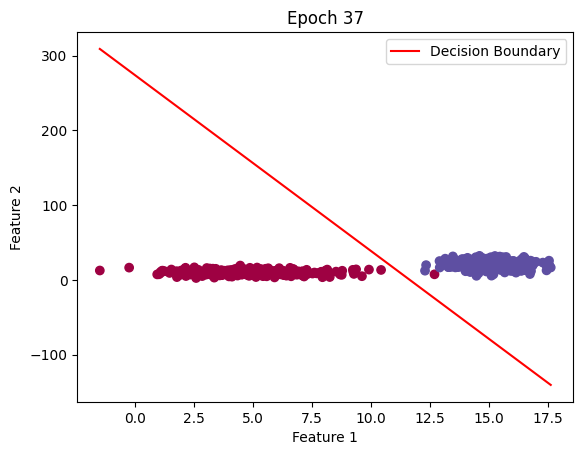

Epoch 39, Loss: nan, Accuracy (by boundary): 99.83%


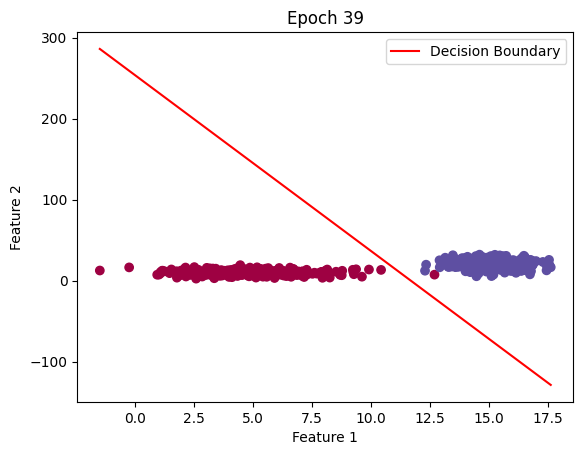

Epoch 41, Loss: nan, Accuracy (by boundary): 99.83%


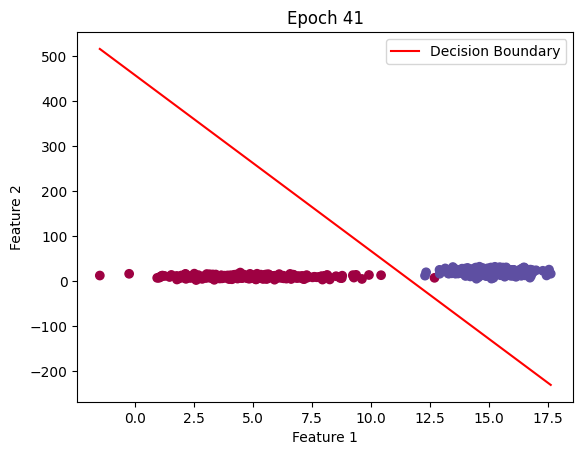

Epoch 43, Loss: nan, Accuracy (by boundary): 99.83%


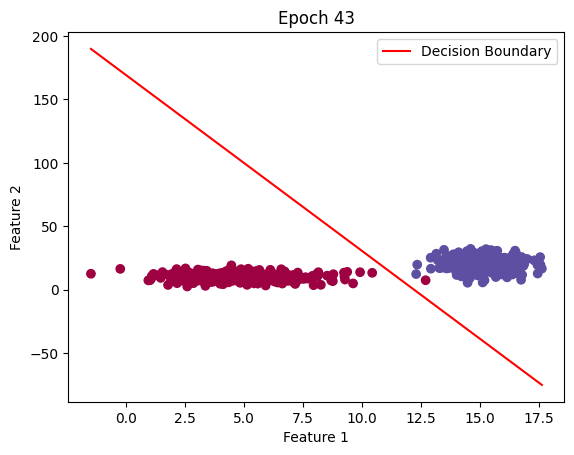

Epoch 45, Loss: nan, Accuracy (by boundary): 99.83%


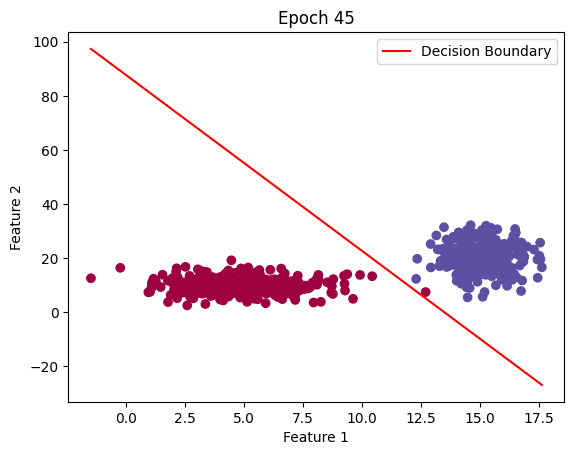

Epoch 47, Loss: nan, Accuracy (by boundary): 99.83%


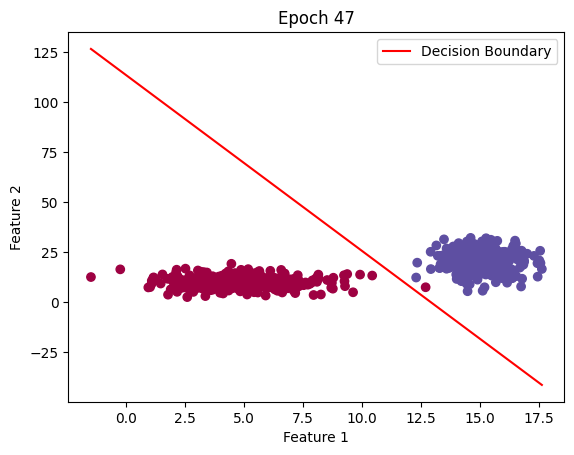

Epoch 49, Loss: nan, Accuracy (by boundary): 99.83%


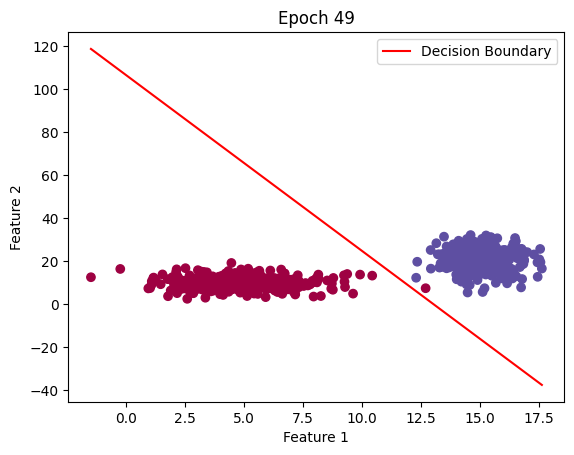

Epoch 51, Loss: nan, Accuracy (by boundary): 99.83%


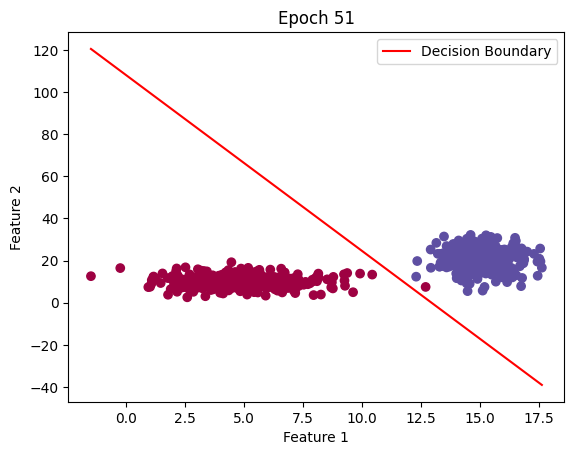

Epoch 53, Loss: nan, Accuracy (by boundary): 99.83%


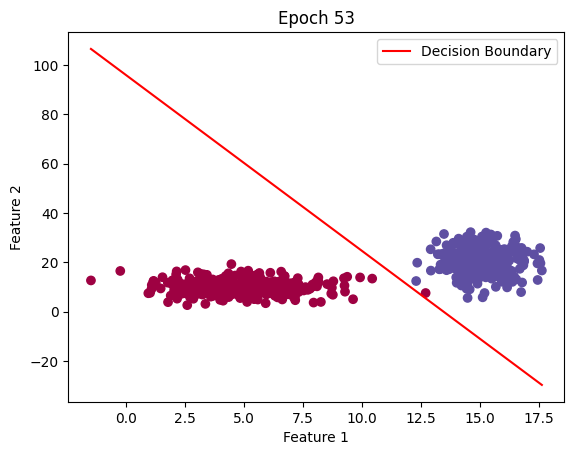

Epoch 55, Loss: nan, Accuracy (by boundary): 99.83%


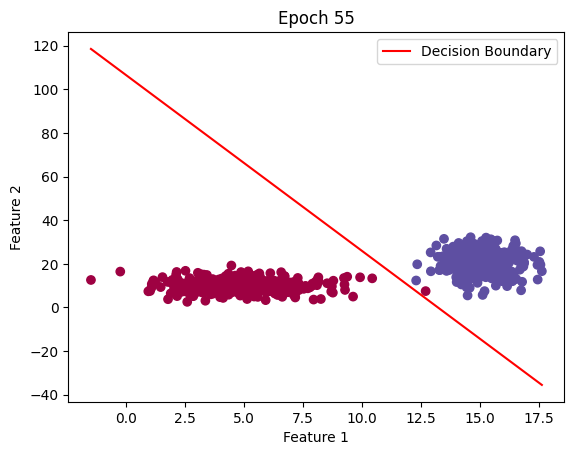

Epoch 57, Loss: nan, Accuracy (by boundary): 99.83%


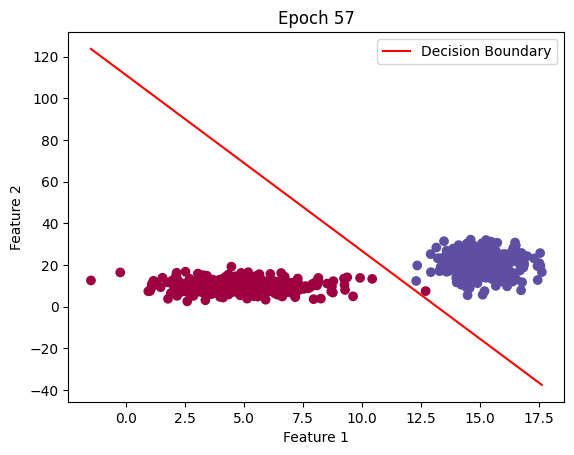

Epoch 59, Loss: nan, Accuracy (by boundary): 99.83%


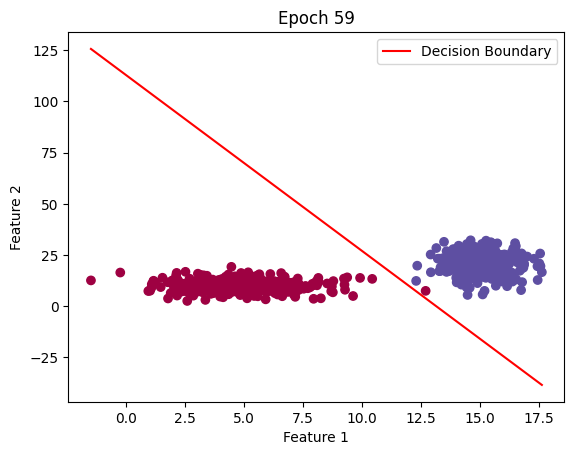

Epoch 61, Loss: nan, Accuracy (by boundary): 99.83%


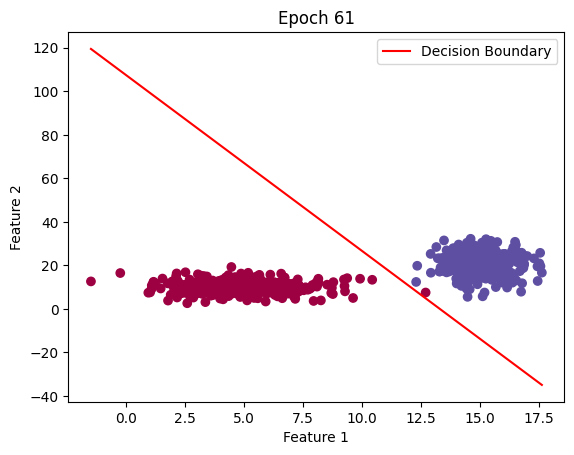

Epoch 63, Loss: nan, Accuracy (by boundary): 99.83%


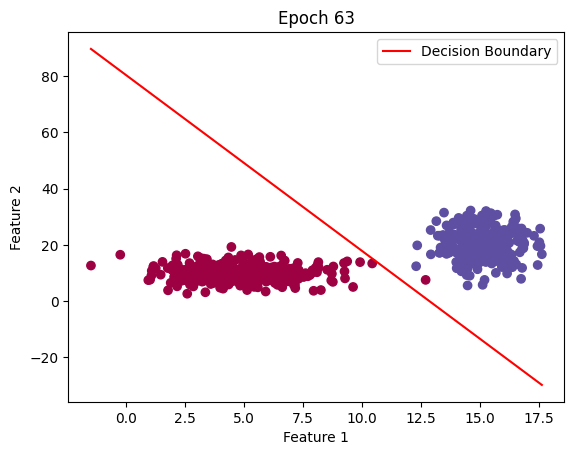

Epoch 65, Loss: nan, Accuracy (by boundary): 99.83%


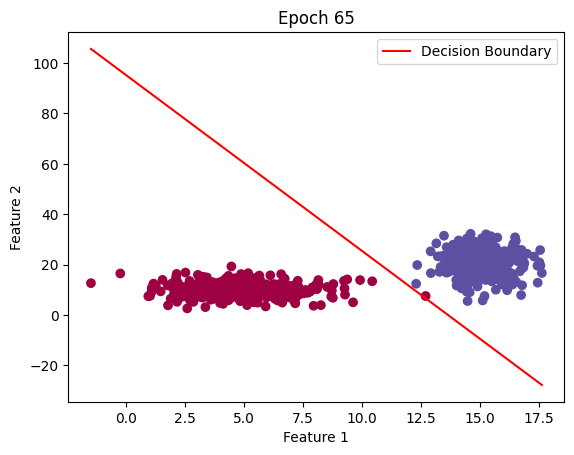

Epoch 67, Loss: nan, Accuracy (by boundary): 99.83%


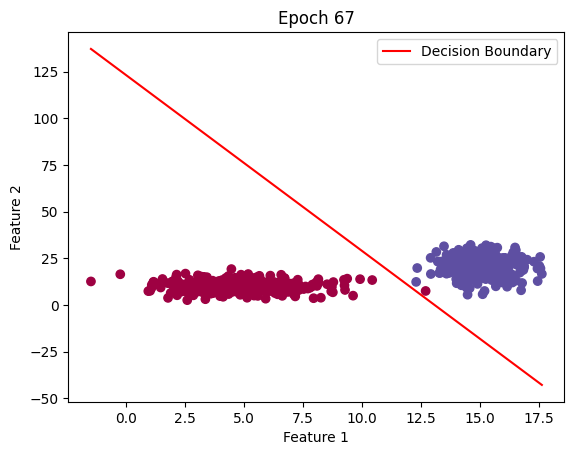

Epoch 69, Loss: nan, Accuracy (by boundary): 99.83%


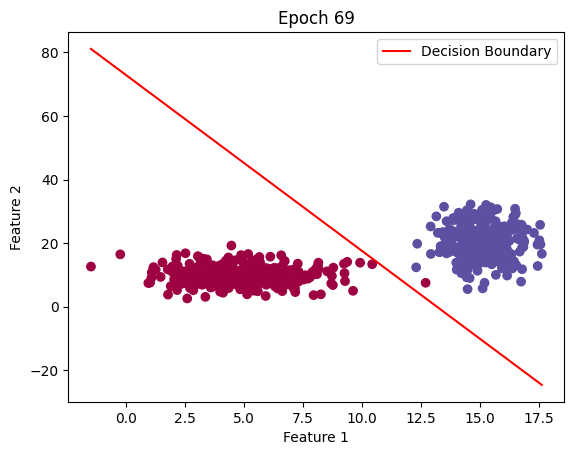

Epoch 71, Loss: nan, Accuracy (by boundary): 99.83%


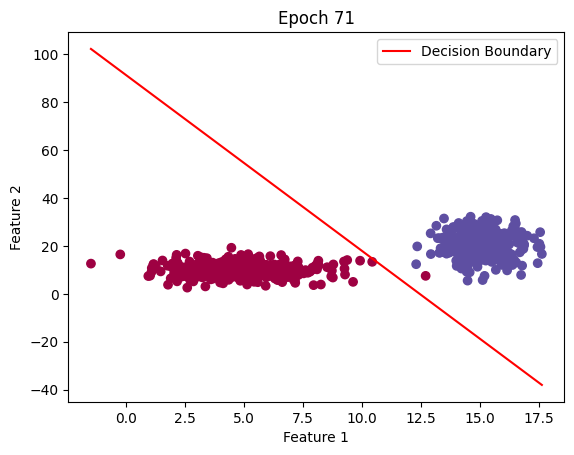

Epoch 73, Loss: nan, Accuracy (by boundary): 99.83%


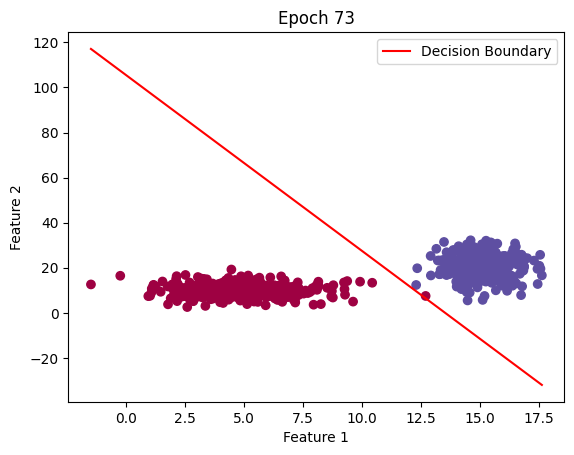

Epoch 75, Loss: nan, Accuracy (by boundary): 99.83%


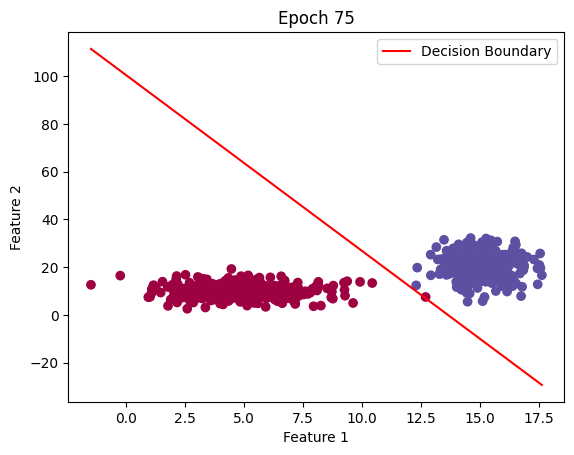

Epoch 77, Loss: nan, Accuracy (by boundary): 99.83%


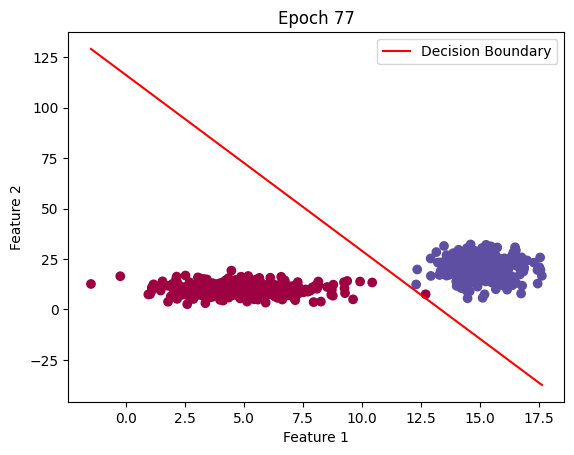

Epoch 79, Loss: nan, Accuracy (by boundary): 99.83%


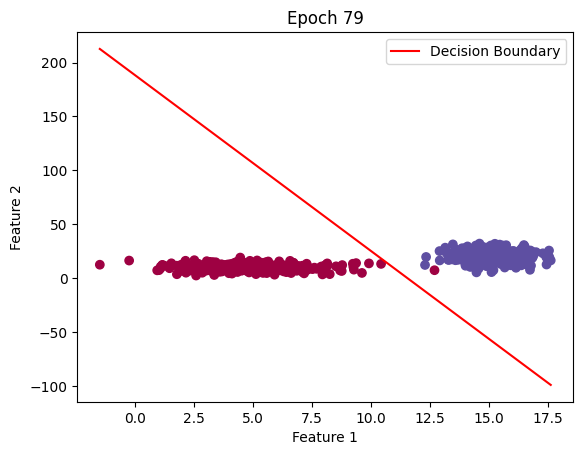

Epoch 81, Loss: nan, Accuracy (by boundary): 99.83%


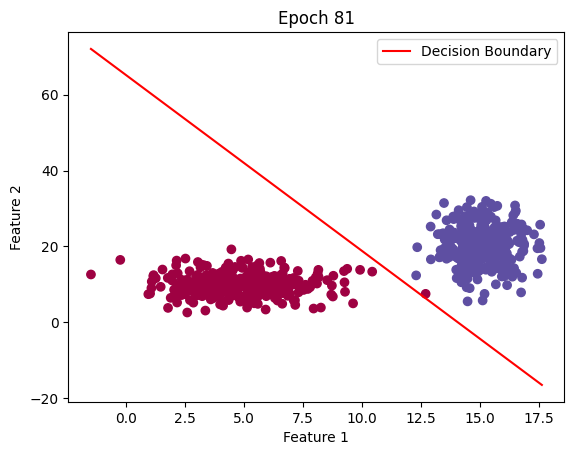

Epoch 83, Loss: nan, Accuracy (by boundary): 100.00%


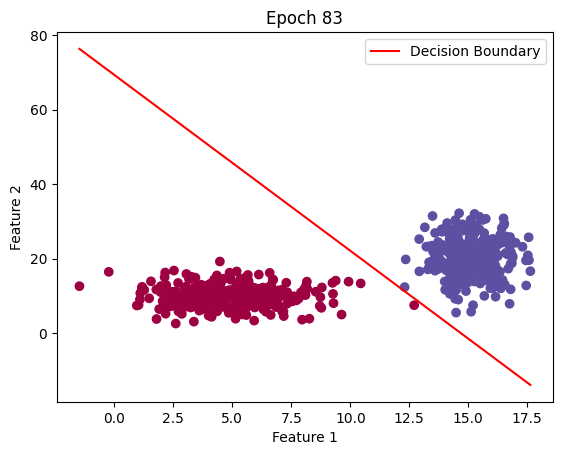

Epoch 85, Loss: nan, Accuracy (by boundary): 100.00%


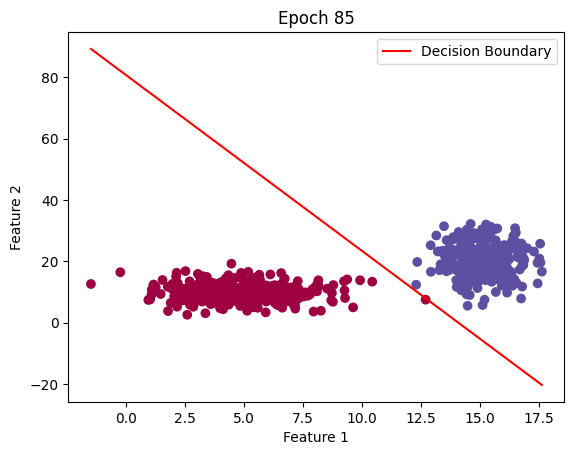

Epoch 87, Loss: nan, Accuracy (by boundary): 100.00%


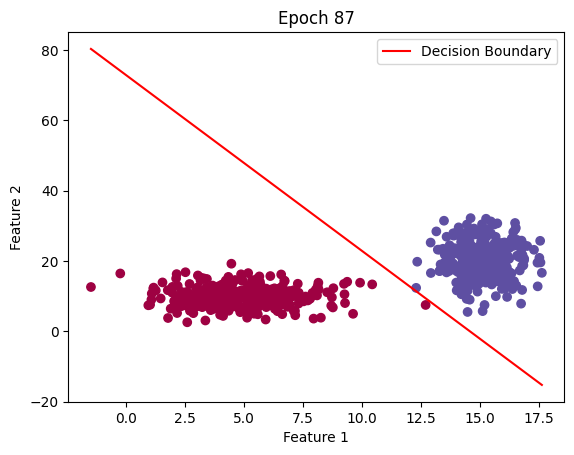

Epoch 89, Loss: nan, Accuracy (by boundary): 99.83%


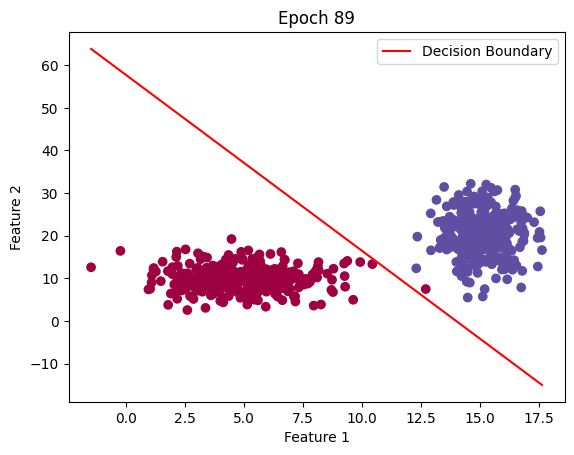

Epoch 91, Loss: nan, Accuracy (by boundary): 100.00%


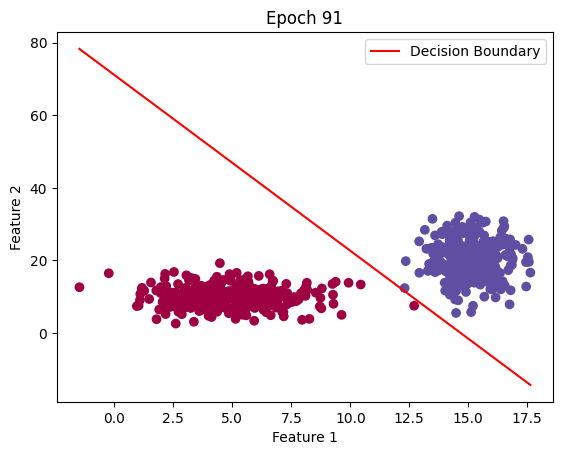

Epoch 93, Loss: nan, Accuracy (by boundary): 99.83%


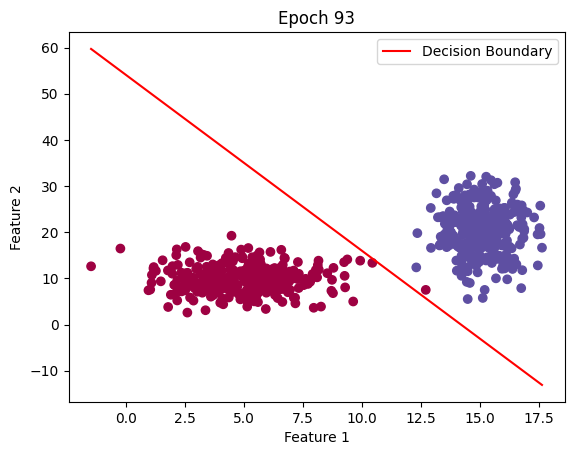

Epoch 95, Loss: nan, Accuracy (by boundary): 100.00%


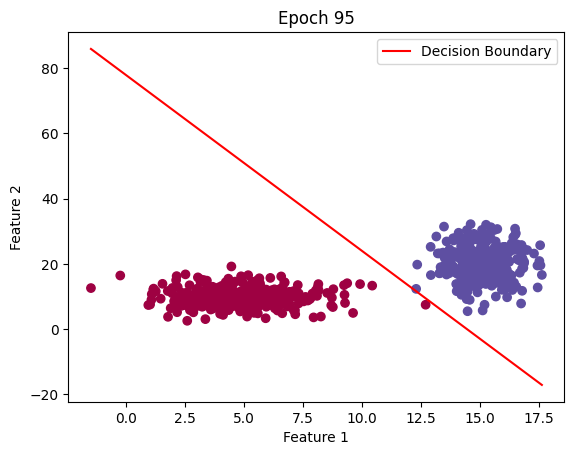

Epoch 97, Loss: nan, Accuracy (by boundary): 99.83%


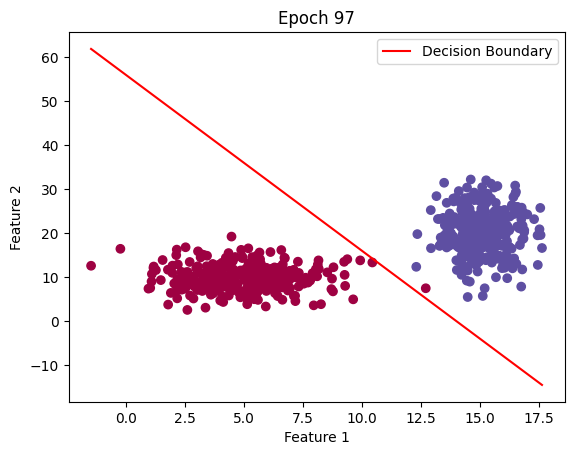

Epoch 99, Loss: nan, Accuracy (by boundary): 100.00%


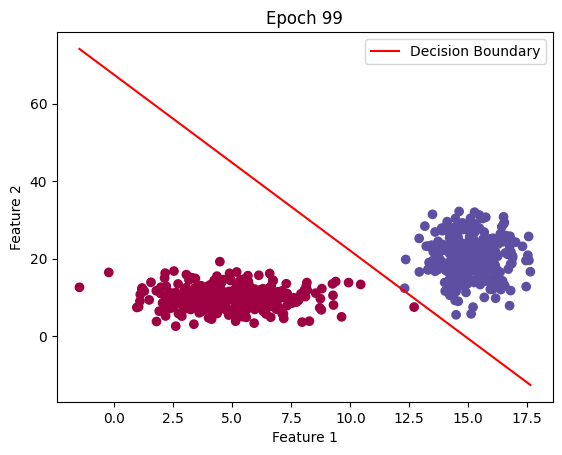

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Sigmoid fonksiyonu
def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

# Modelin doğrusal sınırını çizme fonksiyonu
def plot_decision_boundary(X, y, W, b, epoch):
    # Öğrenilen ağırlıklar
    w1, w2 = W[0].item(), W[1].item()
    bias = b.item()

    # Veri noktalarını scatter plot ile çizelim
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)  # X verisi ve etiketleri
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Modelin öğrendiği doğrusal sınırı çizelim
    x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(w1 * x_vals + bias) / w2
    plt.plot(x_vals, y_vals, label='Decision Boundary', color='red')

    # Başlık ve efsane
    plt.title(f'Epoch {epoch + 1}')
    plt.legend()
    plt.show()

# Modelin doğruluğunu karar sınırına göre hesaplama
def calculate_accuracy_by_boundary(X, y, W, b):
    with torch.no_grad():
        z_test = torch.matmul(X, W) + b
        y_pred_test = sigmoid(z_test)
        
        # Modelin karar sınırının doğru bölgesinde olup olmadığını kontrol et
        correct_preds = 0
        for i in range(len(X)):
            if (y_pred_test[i] >= 0.5 and y[i] == 1) or (y_pred_test[i] < 0.5 and y[i] == 0):
                correct_preds += 1
        accuracy = correct_preds / len(X)
        return accuracy

# Eğitim fonksiyonu
def train_model_with_boundary(X, y, lr=0.01, epochs=100):
    # Başlangıçta sıfır ağırlıklar ve bias
    W = torch.zeros((2, 1), dtype=torch.float32)
    b = torch.zeros(1, dtype=torch.float32)

    for epoch in range(epochs):
        total_loss = 0  # Toplam kayıp
        for i in range(len(X)):
            x_sample, y_sample = X[i], y[i]

            z = torch.matmul(x_sample, W) + b
            y_pred = sigmoid(z)

            # Kayıp fonksiyonu (Binary Cross-Entropy Loss)
            loss = - (y_sample * torch.log(y_pred) + (1 - y_sample) * torch.log(1 - y_pred))
            total_loss += loss.item()

            e = y_pred - y_sample
            grad_W = e * x_sample.view(-1, 1)
            grad_b = e

            # Ağırlıkları güncelle
            W -= lr * grad_W
            b -= lr * grad_b

        # Ortalama kaybı ve görselleştirmeyi her 10 iterasyonda yapalım
        if epoch % 2 == 0:
            accuracy = calculate_accuracy_by_boundary(X, y, W, b)
            print(f"Epoch {epoch + 1}, Loss: {total_loss / len(X)}, Accuracy (by boundary): {accuracy * 100:.2f}%")
            plot_decision_boundary(X, y, W, b, epoch)

    return W, b


# Modeli eğit
W, b = train_model_with_boundary(X, y, lr=0.1, epochs=100)
